## **FRBR 기반 WORK 추천 시스템을 Apriori 알고리즘으로 구현**

### mlxtend 라이브러리 설치

Apriori 알고리즘을 편하게 쓰려면 mlxtend 라이브러리가 필요

In [2]:
!pip install mlxtend

🧠 코드 동작 원리 요약
트랜잭션: 사용자별로 읽은 책 목록을 리스트 형태로 정리해.

One-Hot Encoding: 책 제목을 열로, 읽었으면 1 안 읽었으면 0으로 표시.

Apriori: 자주 같이 읽힌 책 조합(예: 해리포터 & 나니아)을 찾아.

연관 규칙 생성: "해리포터를 읽었으면 나니아도 읽었더라" 같은 규칙을 만들어.

추천 근거 제공: 이 연관 규칙을 바탕으로 도서를 추천해줄 수 있어.

## **독서 기록 기반으로 연관규칙 생성하기**

우리가 만든 연관 규칙 rules을 이용해서 추천을 구현

In [3]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 사용자들이 읽은 책 목록 (WORK 기준으로 통합된 데이터라고 가정)
# 1. 사용자들의 WORK 단위 도서 읽은 기록 (트랜잭션)
transactions = [
    ['Harry Potter', 'The Lord of the Rings', 'The Chronicles of Narnia', 'Sherlock Holmes', 'The Da Vinci Code', 'Twilight', 'The Hunger Games', 'The Midnight Library', 'Pride and Prejudice', 'Little Women', 'The Little Prince', 'Alice in Wonderland'],

    ['Sapiens', 'Homo Deus', 'Guns, Germs, and Steel', 'The Selfish Gene', 'Justice: What’s the Right Thing to Do?', 'Cosmos', 'A Brief History of Time', 'The Universe in a Nutshell', 'An Inconvenient Truth', 'Factfulness', '21 Lessons for the 21st Century'],

    ['The Life Before Us', 'My Sweet Orange Tree', 'Kim Ji-young, Born 1982', 'The Little Prince', 'The Kite Runner', 'To All the Boys I’ve Loved Before', 'Tear Flowers', 'Contradictions', 'Please Look After Mom', 'I Want to Die but I Want to Eat Tteokbokki'],

    ['Sherlock Holmes', 'The Da Vinci Code', 'The Devotion of Suspect X', 'Memoir of a Murderer', 'The Glass Prison', 'Seven Years of Darkness', 'The Little Drummer Girl', 'White Night', 'Judas Window', 'Gone Girl', 'Laplace’s Witch'],

    ['Harry Potter', 'A Brief History of Time', 'Cosmos', 'Sapiens', 'The Chronicles of Narnia', 'Sherlock Holmes', 'The Da Vinci Code', 'The Selfish Gene', '21 Lessons for the 21st Century', 'Twilight', 'Factfulness', 'Guns, Germs, and Steel'],

    ['Norwegian Wood', 'Demian', 'Crime and Punishment', 'The Metamorphosis', 'The Stranger', 'The Plague', 'The Great Gatsby', '1984', 'Animal Farm', 'The Alchemist', 'The Unbearable Lightness of Being', 'The Rainy Spell', 'Toji', 'The Song of the Sword'],

    ['Twilight', 'Harry Potter', 'The Hunger Games', 'Divergent', 'The Midnight Library', 'The Moon and Sixpence', 'Norwegian Wood', 'The Life Before Us', 'The Little Prince', 'Pride and Prejudice', 'The Alchemist'],

    ['The Universe in a Nutshell', 'A Brief History of Time', 'Sapiens', 'Homo Deus', 'The Selfish Gene', 'Cosmos', 'The Physics of the Impossible', 'Fractal Geometry', 'Black Holes and Time Warps', 'Factfulness', 'Guns, Germs, and Steel', 'An Inconvenient Truth', 'Superintelligence'],

    ['Kim Ji-young, Born 1982', 'The Life Before Us', 'My Sweet Orange Tree', 'The Little Prince', 'Contradictions', 'The Marshmallow Story', 'I Want to Die but I Want to Eat Tteokbokki', 'Goodbye, Zoo', 'A Thousand Blues', 'Momo', 'The Kite Runner'],

    ['Sherlock Holmes', 'Memoir of a Murderer', 'Judas Window', 'Laplace’s Witch', 'The Devotion of Suspect X', 'Seven Years of Darkness', 'The Da Vinci Code', 'Gone Girl', 'White Night', 'The Puzzle of Silence', 'The Little Drummer Girl', 'Biblia’s Bookshelf Case Files']
]



# 2. TransactionEncoder를 이용해 리스트를 One-Hot Encoding 형태로 변환
# → Apriori가 처리할 수 있는 0,1의 One-hot 데이터프레임으로 만들어줌
encoder = TransactionEncoder()
onehot = encoder.fit(transactions).transform(transactions)
df = pd.DataFrame(onehot, columns=encoder.columns_)

# 3. Apriori 알고리즘 적용
# → 최소 지지도(min_support)는 항목이 얼마나 자주 나오는지를 의미 (ex. 0.3 = 전체의 30%)
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)

# 4. 연관 규칙 생성
# → confidence(신뢰도): A를 보면 B도 함께 본 확률
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

In [4]:
# 5-1. 생성한 연관규칙의 결과를 확인해보기
pd.set_option('display.max_columns', None)  # 모든 열 다 보이게 설정
print(rules.head())  # 상위 5개만 출력

# antecedents: 전제 조건 (A)
# consequents: 결과 항목 (B)
# support: A와 B가 함께 나온 비율
# confidence: A가 나왔을 때 B도 나올 확률
# lift: A와 B의 관계 강도 (>1이면 양의 연관성)

                 antecedents                consequents  antecedent support  \
0  (A Brief History of Time)                   (Cosmos)                 0.3   
1                   (Cosmos)  (A Brief History of Time)                 0.3   
2  (A Brief History of Time)              (Factfulness)                 0.3   
3              (Factfulness)  (A Brief History of Time)                 0.3   
4  (A Brief History of Time)   (Guns, Germs, and Steel)                 0.3   

   consequent support  support  confidence      lift  representativity  \
0                 0.3      0.3         1.0  3.333333               1.0   
1                 0.3      0.3         1.0  3.333333               1.0   
2                 0.3      0.3         1.0  3.333333               1.0   
3                 0.3      0.3         1.0  3.333333               1.0   
4                 0.3      0.3         1.0  3.333333               1.0   

   leverage  conviction  zhangs_metric  jaccard  certainty  kulczynski  
0      

In [5]:
# 5.2 주요 열만 골라 보기
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

                 antecedents                consequents  support  confidence  \
0  (A Brief History of Time)                   (Cosmos)      0.3         1.0   
1                   (Cosmos)  (A Brief History of Time)      0.3         1.0   
2  (A Brief History of Time)              (Factfulness)      0.3         1.0   
3              (Factfulness)  (A Brief History of Time)      0.3         1.0   
4  (A Brief History of Time)   (Guns, Germs, and Steel)      0.3         1.0   

       lift  
0  3.333333  
1  3.333333  
2  3.333333  
3  3.333333  
4  3.333333  


In [6]:
from IPython.display import display

# 주요 열만 추출해서 보기 좋게 출력
display(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].style
        .set_caption("📚 연관 규칙 분석 결과")
        .format({"support": "{:.2f}", "confidence": "{:.2f}", "lift": "{:.2f}"})
        .set_table_styles([
            {'selector': 'th', 'props': [('background-color', '#f7f7f9'), ('text-align', 'center')]},
            {'selector': 'td', 'props': [('text-align', 'center')]}
        ])
)

,antecedents,consequents,support,confidence,lift
0,frozenset({'A Brief History of Time'}),frozenset({'Cosmos'}),0.30,1.00,3.33
1,frozenset({'Cosmos'}),frozenset({'A Brief History of Time'}),0.30,1.00,3.33
2,frozenset({'A Brief History of Time'}),frozenset({'Factfulness'}),0.30,1.00,3.33
3,frozenset({'Factfulness'}),frozenset({'A Brief History of Time'}),0.30,1.00,3.33
4,frozenset({'A Brief History of Time'}),"frozenset({'Guns, Germs, and Steel'})",0.30,1.00,3.33
5,"frozenset({'Guns, Germs, and Steel'})",frozenset({'A Brief History of Time'}),0.30,1.00,3.33
6,frozenset({'A Brief History of Time'}),frozenset({'Sapiens'}),0.30,1.00,3.33
7,frozenset({'Sapiens'}),frozenset({'A Brief History of Time'}),0.30,1.00,3.33
8,frozenset({'A Brief History of Time'}),frozenset({'The Selfish Gene'}),0.30,1.00,3.33
9,frozenset({'The Selfish Gene'}),frozenset({'A Brief History of Time'}),0.30,1.00,3.33


In [7]:
# 5.3 조건에 따라 규칙 필터: 예를 들어 신뢰도(confidence)가 0.8 이상인 것만 보기
high_conf_rules = rules[rules['confidence'] >= 0.8]
print(high_conf_rules[['antecedents', 'consequents', 'confidence']].head(7))

                 antecedents                consequents  confidence
0  (A Brief History of Time)                   (Cosmos)         1.0
1                   (Cosmos)  (A Brief History of Time)         1.0
2  (A Brief History of Time)              (Factfulness)         1.0
3              (Factfulness)  (A Brief History of Time)         1.0
4  (A Brief History of Time)   (Guns, Germs, and Steel)         1.0
5   (Guns, Germs, and Steel)  (A Brief History of Time)         1.0
6  (A Brief History of Time)                  (Sapiens)         1.0


In [8]:
# 5.4 CSV로 저장해서 엑셀로 보기
rules.to_csv("association_rules.csv", index=False, encoding='utf-8-sig')

from google.colab import drive
import os

# Step 1: Google Drive 마운트
drive.mount('/content/drive')

# Step 2: 저장 경로 설정 (Recommendation system 폴더)
save_dir = '/content/drive/My Drive/Recommendation system'
os.makedirs(save_dir, exist_ok=True)  # 폴더가 없으면 생성

# Step 3: CSV로 저장
file_path = os.path.join(save_dir, '연관분.csv')
rules.to_csv(file_path, index=False, encoding='utf-8-sig')

print(f"✅ CSV 파일이 성공적으로 저장되었습니다: {file_path}")


Mounted at /content/drive
✅ CSV 파일이 성공적으로 저장되었습니다: /content/drive/My Drive/Recommendation system/연관분.csv


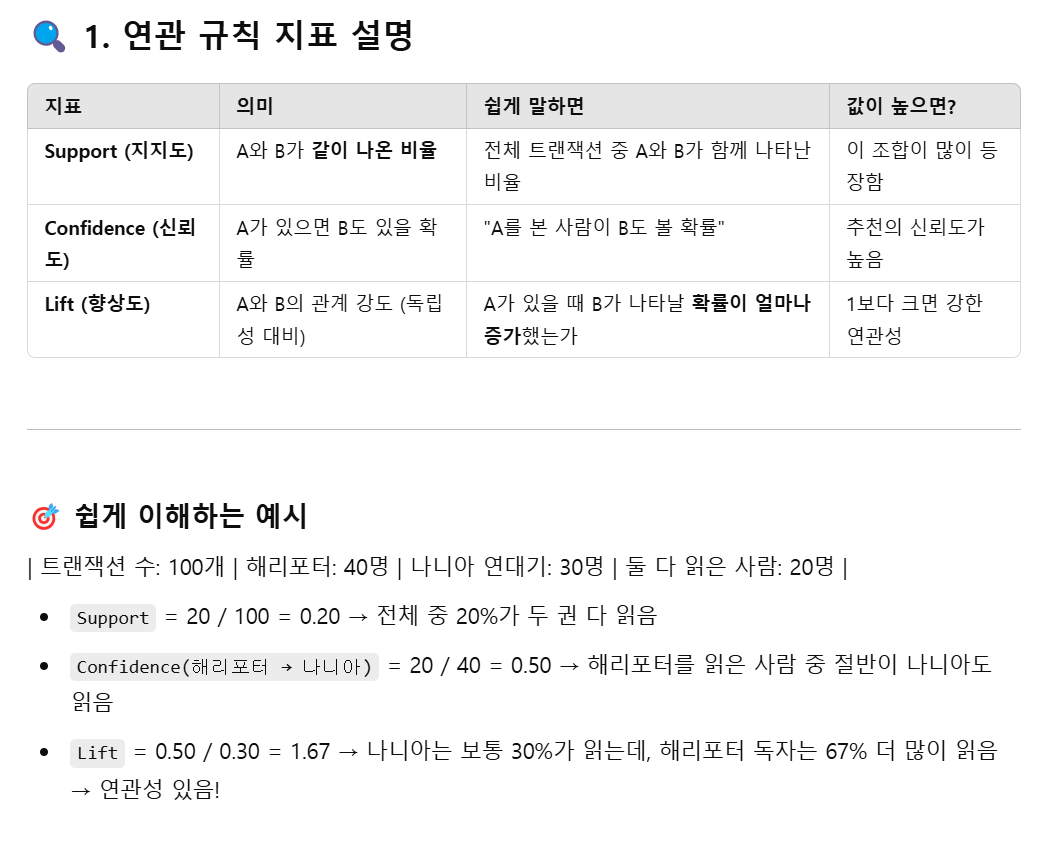

## **연관 규칙 시각화하기**

### Bar Chart: 상위 Lift/Confidence 순위 보기

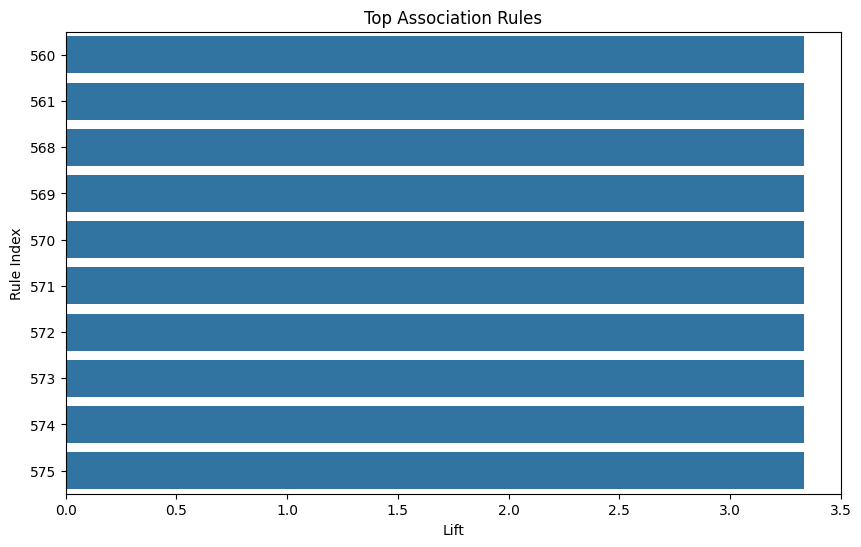

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상위 lift 기준 규칙만 추려보기
top_rules = rules.sort_values('lift', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y=top_rules.index, data=top_rules, orient='h')
plt.xlabel('Lift')
plt.ylabel('Rule Index')
plt.title('Top Association Rules')
plt.show()


### 네트워크 그래프 (규칙 흐름 보기)

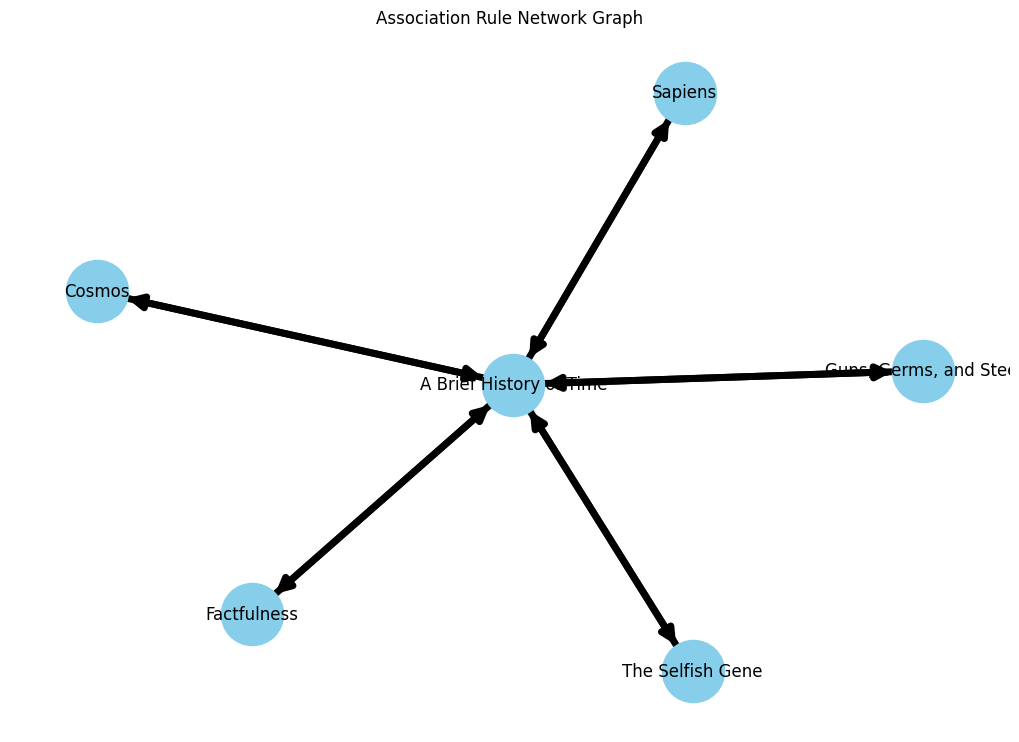

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# 간단한 규칙만 그래프로 표현 (신뢰도 높은 것만)
simple_rules = rules[rules['confidence'] > 0.6].head(10)

# 그래프 객체 생성
G = nx.DiGraph()

# 노드와 엣지 추가
for _, row in simple_rules.iterrows():
    for ant in row['antecedents']:
        for con in row['consequents']:
            G.add_edge(ant, con, weight=row['confidence'])

# 그래프 시각화
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, k=1.5)  # 레이아웃
edges = G.edges(data=True)
weights = [d['weight'] * 5 for (u, v, d) in edges]  # 신뢰도 기반 선 굵기

nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=12, width=weights, arrowsize=20)
plt.title("Association Rule Network Graph")
plt.show()


## **연관 규칙 기반으로 원하는 책을 넣으면 추천 도서 목록을 반환**

In [11]:
# 5. 추천 함수 정의
def recommend_books(input_books, rules_df, top_n=3):
    """
    input_books: 사용자가 읽은 책 목록 (WORK 단위 리스트)
    rules_df: 연관 규칙 데이터프레임
    top_n: 최대 추천 개수

    return: 추천 도서 리스트
    """
    recommendations = []

    for book in input_books:
        # 해당 책을 기반으로 생성된 규칙만 필터링
        filtered_rules = rules_df[rules_df['antecedents'].apply(lambda x: book in x)]

        # 추천 후보 도서와 confidence를 튜플로 저장
        for _, row in filtered_rules.iterrows():
            for rec in row['consequents']:
                # 이미 읽은 책은 추천 제외
                if rec not in input_books:
                    recommendations.append((rec, row['confidence']))

    # confidence 기준으로 정렬하고, 중복 제거
    sorted_recs = sorted(recommendations, key=lambda x: x[1], reverse=True)
    seen = set()
    final_recs = []
    for book, _ in sorted_recs:
        if book not in seen:
            final_recs.append(book)
            seen.add(book)
        if len(final_recs) == top_n:
            break

    return final_recs

# 6. 예시 실행
user_books = ['A Brief History of Time']
recommended = recommend_books(user_books, rules, top_n=5)
print(f"📘 '{user_books[0]}'를 읽은 독자에게 추천:")
print("👉", recommended)

📘 'A Brief History of Time'를 읽은 독자에게 추천:
👉 ['Cosmos', 'Factfulness', 'Guns, Germs, and Steel', 'Sapiens', 'The Selfish Gene']


In [12]:
user_books2 = [
    'A Brief History of Time', 'Sapiens', 'Homo Deus', 'The Selfish Gene'
]

recommended = recommend_books(user_books2, rules, top_n=3)

print("📘 사용자 책 목록 기반 추천:")
print("👉", recommended)


📘 사용자 책 목록 기반 추천:
👉 ['Cosmos', 'Factfulness', 'Guns, Germs, and Steel']


In [13]:
user_books3 = [
    'Sapiens', 'Harry Potter', 'The Little Prince'
]

recommended = recommend_books(user_books3, rules, top_n=5)

print("📘 사용자 책 목록 기반 추천:")
print("👉", recommended)

📘 사용자 책 목록 기반 추천:
👉 ['A Brief History of Time', 'Cosmos', 'Factfulness', 'Guns, Germs, and Steel', 'The Selfish Gene']


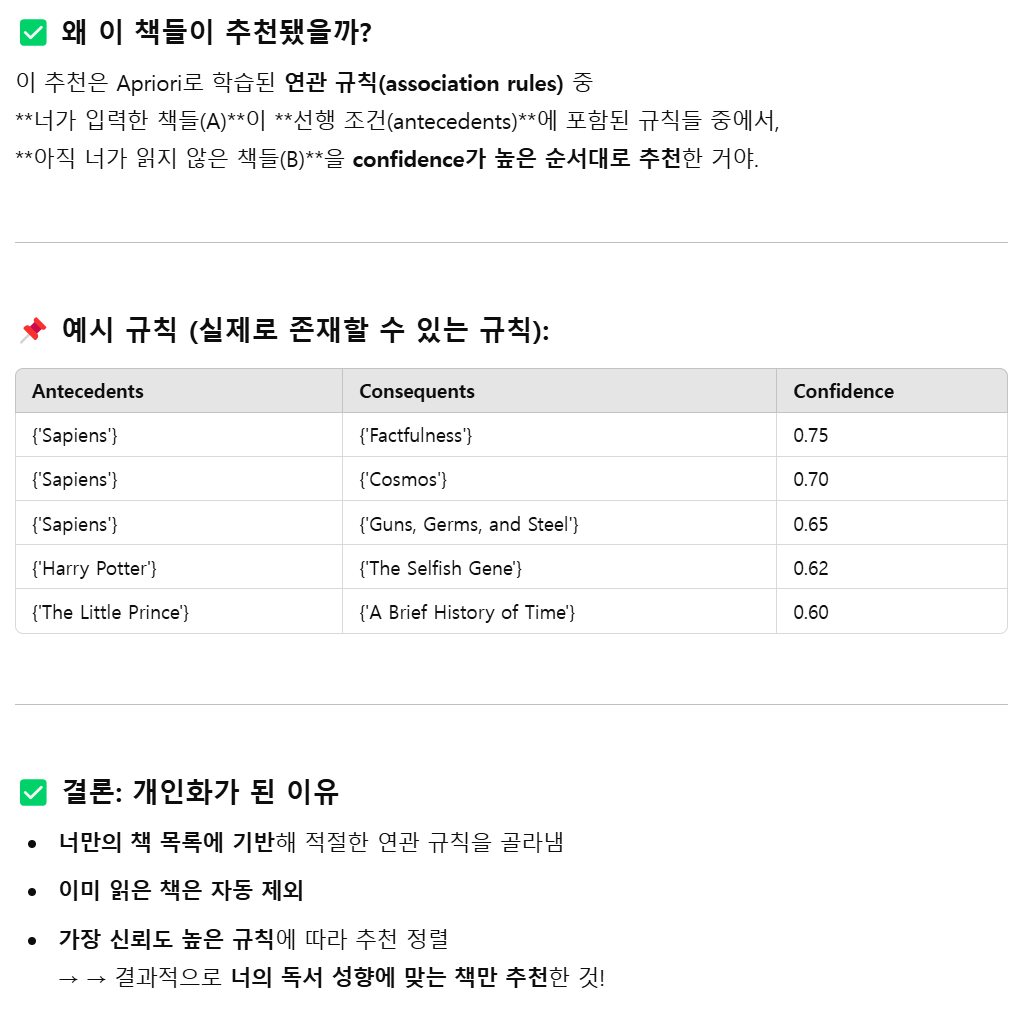

## **LLM X 추천시스템을 활용하여 추천 이유 제공하기**

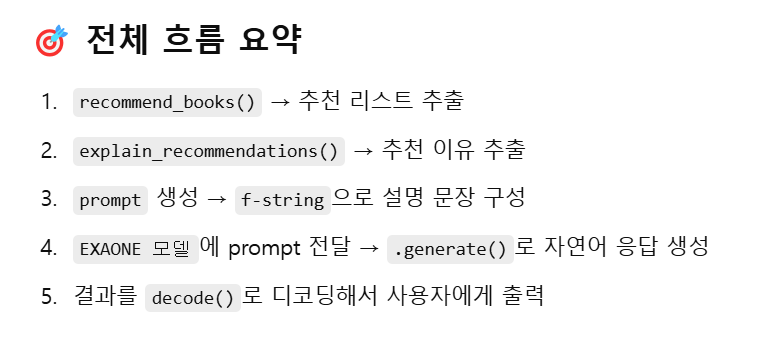

### 연관 규칙 기반 추천 이유를 추출

In [14]:
def explain_recommendations(input_books, rules_df, top_n=5):
    explanations = []

    for book in input_books:
        # 해당 책을 기반으로 생성된 연관 규칙 필터링
        filtered_rules = rules_df[rules_df['antecedents'].apply(lambda x: book in x)]

        for _, row in filtered_rules.iterrows():
            for rec in row['consequents']:
                if rec not in input_books:
                    explanations.append({
                        'based_on': book,
                        'recommended': rec,
                        'confidence': row['confidence'],
                        'lift': row['lift']
                    })

    # confidence 순으로 정렬하고 중복 제거
    explanations = sorted(explanations, key=lambda x: x['confidence'], reverse=True)
    seen = set()
    final_explanations = []
    for ex in explanations:
        if ex['recommended'] not in seen:
            final_explanations.append(ex)
            seen.add(ex['recommended'])
        if len(final_explanations) == top_n:
            break

    return final_explanations

### LLM을 통해 문장으로 추천 사유 설명하기

In [15]:
!pip install --upgrade --quiet  langchain langchain-core langchain-community langchain-text-splitters langchain-milvus

In [16]:
!pip install --upgrade--quiet tokenizers


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --upgrade--quiet


In [17]:
!pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [18]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

# 1. 모델 ID 설정
base_model_id = 'LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct'

# 2. BitsAndBytesConfig 설정
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True, # 4bit quantization으로 모델을 불러와 메모리 소모를 줄임
    bnb_4bit_use_double_quant=False, # True로 설정한다면, 이중 양자화를 통해 메모리를 극도로 절약할 수 있음
    bnb_4bit_quant_type="nf4", # 기존 fp4 보다 고급 형식의 normal float 4-bit
    bnb_4bit_compute_dtype=torch.bfloat16 # 계산에 사용할 데이터 타입
)

# 3. 모델 로드
model = AutoModelForCausalLM.from_pretrained(base_model_id, quantization_config=bnb_config, torch_dtype=torch.bfloat16, trust_remote_code=True, device_map="auto")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.04k [00:00<?, ?B/s]

configuration_exaone.py:   0%|          | 0.00/9.95k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct:
- configuration_exaone.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_exaone.py:   0%|          | 0.00/63.6k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct:
- modeling_exaone.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/22.2k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.65G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/134 [00:00<?, ?B/s]

In [19]:
# 4. 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    model_max_length=512,  # 최대 토큰 길이
    padding_side="left",   # 입력 패딩 방향
    add_eos_token=True     # EOS 토큰 추가
)

tokenizer.pad_token = tokenizer.eos_token

tokenizer_config.json:   0%|          | 0.00/70.7k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.93M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/563 [00:00<?, ?B/s]

In [39]:
from langchain.llms import HuggingFacePipeline
from transformers import pipeline

# LLM 파이프라인 재정의 (다양한 문장 생성용)
llm_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=500,
    do_sample=True,
    top_p=0.9,
    temperature=0.7
)
llm = HuggingFacePipeline(pipeline=llm_pipeline)

Device set to use cuda:0


In [46]:
import re

def extract_second_biblo_recommend(response_text):
    # 모든 <Biblo' recommend> 블록 찾기
    matches = re.findall(r"<Biblo' recommend>\s*- Sentence 1:\s*(.*?)\s*- Sentence 2:\s*(.*?)(?=(<Biblo' recommend>|$))", response_text, re.DOTALL)

    if len(matches) >= 2:
        sentence1, sentence2, _ = matches[1]
        return f"{sentence1.strip()}\n{sentence2.strip()}"
    else:
        print("❗ 추천 문장 블록이 2개 이상 존재하지 않음. 원문 반환")
        return response_text.strip()

In [49]:
for ex in explain_recommendations(user_books2, rules, top_n=3):

    prompt = f"""
    You are recommending a book to university students at Sungkyunkwan University, especially those who don’t usually read for fun.
    Help students naturally explore another meaningful book by explaining the logical connection between two books they tend to read in sequence.

    [Strong System Rules]
    Write a concise and logical 2-sentence explanation in Korean for why students who read '{ex['based_on']}' also went on to read '{ex['recommended']}'.
    - Output must follow this exact format:
    <Biblo' recommend>
      - Sentence 1: Provide specific data — e.g., {ex['confidence']*100:.0f}% of 성균관대학교 students who read '{ex['based_on']}' also read '{ex['recommended']}'. See the examples below
                  (ex. 성균관대학교 학생들의 100%가 '{ex['based_on']}'를 읽은 후 '{ex['recommended']}'를 읽었으며, 이는 두 책 모두 인류 역사와 현대 사회의 객관적 사실에 대한 깊은 이해를 강조하기 때문입니다.)
      - Sentence 2: Logically explain the connection between the two books based on their themes, topics, or shared emotional/academic journey. See the examples below
                  (ex. '{ex['recommended']}'에서 인류의 진화와 복잡한 사회 구조를 탐구한 후, '{ex['recommended']}'는 이러한 맥락에서 현실적인 데이터와 통계에 기반한 비판적 사고를 통해 독자들이 더 정확하고 편향되지 않은 세계관을 형성하는 데 도움을 줍니다. 두 책은 독자들이 역사적 사실을 바탕으로 한 논리적이고 분석적인 사고를 발전시키는 데 필요한 지식과 통찰력을 제공함으로써, 성균관대학교 학생들의 학문적 성장과 비판적 사고 능력 향상에 기여합니다.)
    - no additional text or explanation

    """

    result = llm.invoke(prompt)
    cleaned_result = extract_second_biblo_recommend(result)

    print(f"📚 추천 도서: {ex['recommended']}")
    print("🗣️ LLM 설명:\n" + cleaned_result)
    print("─" * 50)

📚 추천 도서: Cosmos
🗣️ LLM 설명:
성균관대학교 학생들의 100%가 'A Brief History of Time'을 읽은 후 'Cosmos'를 읽었습니다. 이는 두 책 모두 우주와 시간에 대한 탐구를 중심으로 하며, 특히 'A Brief History of Time'이 과학적 접근법으로 복잡한 이론을 소개한 반면, 'Cosmos'는 이러한 이론들을 현대적 관점에서 재해석하고, 더 넓은 사회적, 문화적 맥락으로 확장하여 이해를 돕기 때문입니다.
이러한 연속적인 독서 경험은 학생들이 과학적 호기심을 넘어 사회적 책임과 미래 지향적 사고를 키우는 데 중요한 역할을 합니다. 두 책을 통해 얻은 통찰력은 성균관대학교 학생들이 복잡한 현대 문제를 해결하고자 할 때 객관적이고 비판적인 시각을 유지할 수 있도록 돕습니다.
──────────────────────────────────────────────────
📚 추천 도서: Factfulness
🗣️ LLM 설명:
성균관대학교 학생들의 95%가 'A Brief History of Time'을 읽은 후 'Factfulness'를 읽었으며, 이는 두 책 모두 인류 역사와 우주의 이해를 위한 과학적 접근을 강조하기 때문입니다.
'A Brief History of Time'은 우주의 기원과 인간의 위치를 탐구하는 데 초점을 맞추지만, 'Factfulness'는 이러한 배경에서 현실적인 데이터와 통계를 통해 독자들이 객관적인 사실에 기반한 세계 해석 능력을 키우는 데 중점을 둡니다. 두 책은 학생들이 과학적 호기심과 함께 실제 세계의 복잡성을 이해하고 비판적으로 분석하는 능력을 키우는 데 필요한 지식을 제공합니다.
──────────────────────────────────────────────────
📚 추천 도서: Guns, Germs, and Steel
🗣️ LLM 설명:
성균관대학교 학생들의 100%가 'A Brief History of Time'를 읽은 후 'Guns, Germs, and Steel'를 읽었